# Question 1

I think that the three most important characteristics for a successful data scientist are:

- Analytical skills:
This is the most obvious skill for a data scientist to have but analytical skills does not just consist of critical thinking and logical reasoning. Analytical skills also consists of creativity and research. A data scientist is required to infer and create solutions from the data. Formulating data driven solutions would require creativity. This is especially needed when there are multiple solutions to a problem or when the solution differs from every situation and there is no set "correct" solution. Research is also crucial as it is a form of inference, gathering and analysing data to draw conclusions and generate new knowledge. 
--------------------------------------------------------------------------------------------------------------------------------
- Proficient programming skills:
Knowing the theory of statistics is not enough. A data scientist must be able to implement and apply statistical tools to the data. This implementation is through the use of programming. In order to analyse and work with big data, proficient programming skills is required. There are many programming languages used to store, build and extract data from databases. Data manipulation, visualisation and predictive modelling are all required to be done in some programming language.
--------------------------------------------------------------------------------------------------------------------------------
- Effective communication skills:
A data scientist must be able to effectively interpret findings and will often work with non-technical people such as stakeholders. Thus, communication skills are essential to effectively convey technical terms to stakeholders and articulate findings, along with their implications for business.

# Question 2

My three favourite technical tools for data science are:

- Python and Jupyter notebook:
The syntax of Python is simple and easy to understand. There are also many powerful packages available for data analysis such as pandas, matplotlib and tensorflow. Python is also a free platform and if I do get stuck on a code, there is a high chance that someone else experienced the same issue and a solution could be found on stackoverflow. I like using Jupyter notebook for documentation as it integrates code, results and text. 
--------------------------------------------------------------------------------------------------------------------------------
- GitHub:
Although I have only used GitHub to share my work, it can be used for collaboration and tracking. My favourite feature of Git is the tracking of code. If I make a mistake and somehow "break" my code, I can backtrack and undo what I had just done.

--------------------------------------------------------------------------------------------------------------------------------
- PowerBI and Kaggle:
I am currently teaching myself PowerBI because I am fascinated by its capability to create visually captivating and interactive dashboards. Dashboards are effective to understand and interpret information at a glance. Kaggle is my favourite platform to get different types of data for practice. 


# Question 3

## Step 1: Research

The first step is to understand the requirements of the client. Discussing the objectives, scope, deliverables, potential limitations and the importance/benefits of the project for business; e.g efficiency in recruitment and reducing costs. I would also research existing solutions and best practices in hiring and recruitment. I would also discuss with the client in which programming language should the project be implemented in as well as potential variables/features that should be included in the data. Once I have a better understanding of what is required I would draw up a project proposal for the client. When the proposal is approved I will collect the relevant data on past applicants and hiring outcomes. 

## Step 2: Data cleaning

The second step is to ensure that the data is in the correct format for analysis. This would include variable engineering, encoding categorical variables and handling missing values.

## Step 3: Data exploration

This is done to understand the data and draw inference that would assist in the modelling process such as variable selection and assessing the distributions. Assessing the distributions of variables is essential for choosing an appropriate machine learning model. For example, if the target variable is categorical then a logistic regression model would be appropriate but if there are also many missing values in the data then a logistic regression model would not be good. Thus, it is important to explore the data to ensure that the appropriate machine learning model is used. This step goes hand-in-hand with step 2. 

I would generate bivariate plots of the variables and perform correlation analysis for potential variables that should be included in the model. Since the target variable is whether an applicant should be hired or not (binary), I would analyse the variables against the target and identify possible relationships. Checking for multicollinearity is also important to avoid redundant variables being included in the model and to improve model accuracy. To evaluate the distributions of the variables I would generate KDE plots as its more interpretable than histograms.

## Step 4: Model building

Based on the number of years of data on applicants I can assume the dataset is large enough to split into a training and validation dataset. Common splits are 70:30 or 80:20 training and validation repsectively. Once the data is split I would build a random forest model. This choice would be based on the data exploration, if there were missing values in the dataset and if imputations were not appropriate for certain variables, e.g a variable that has a high proportion of missing values with no clear dominant category. Tree based models can handle missing values and can capture non-linear relationships. They are also appropriate for profiling applicants due to its feature importance measuring a features contribution to the model's predictive performance i.e. predicting whether an applicant should be hired or not. The model would be built on the training dataset and its performance would be evaluated. Common metrics used to evaluate binary classification models are AUROC, F1 score, accuracy, precision and recall. 

## Step 5: Model evaluation

I would then evaluate the model on "unseen" data, the validation dataset. The same metrics used to evaluate the model's performance on the training dataset would be used to evaluate its performance on the validation dataset. The results of the metrics on the training and validation datasets must be compared. This comparison would indicate whether the model overfits the data. If there are little to no discrepencies between the training and validation metrics then the model is stable and fits the data well.

## Step 6: Conclusions and recommendations

I would then interpret my findings based on the profiles produced. I would also highlight the potential bias in the data or model if there are any as this would affect the fairness of using AI/machine learning for hiring decisions. I would mention any limitations encountered and suggest recommendations for improvement of the hiring system. Perhaps integrating the model with the current hiring process and using it as a tool to assist rather than solely relying on it.

# Question 4

In [108]:
# Import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
# Read in data

df = pd.read_csv('.\\data\\test_data.csv')

df.head()

,Unnamed: 0,value,test,sub_group
0,1,1.481962,A,1
1,2,1.201471,B,1
2,3,-0.832956,B,1
3,4,0.690690,A,1
4,5,0.266877,A,2


In [110]:
# Rename first column

df = df.rename(columns={'Unnamed: 0': 'Index'})

df.head()

,Index,value,test,sub_group
0,1,1.481962,A,1
1,2,1.201471,B,1
2,3,-0.832956,B,1
3,4,0.690690,A,1
4,5,0.266877,A,2


In [111]:
# Check data types and change accordingly

print(df.dtypes)

df['sub_group'] = df['sub_group'].astype('category')

print(df.dtypes)

Index          int64
value        float64
test          object
sub_group      int64
dtype: object
Index           int64
value         float64
test           object
sub_group    category
dtype: object


### Evaluate data

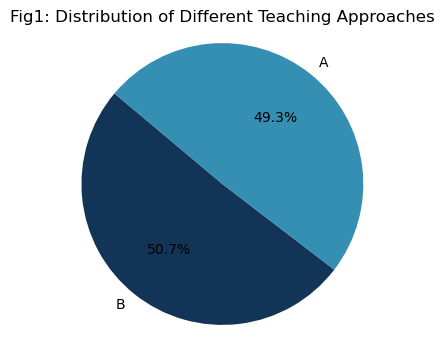

In [112]:
# Pie chart

# Calculate frequencies of each unique value in the 'test' column
test_counts = df['test'].value_counts()

# Extract labels and sizes
labels = test_counts.index
sizes  = test_counts.values

# Create pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#123456', '#358fb3'])
plt.title('Fig1: Distribution of Different Teaching Approaches')
plt.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle

# Show plot
plt.show()

It can be seen from the pie chart that the percentages of test group A and B indicate a near-balanced distribution, with test group B being slightly higher by 1.4%.

In [89]:
# Separate the data by test group

df_A = df[df['test'] == 'A']
df_B = df[df['test'] == 'B']

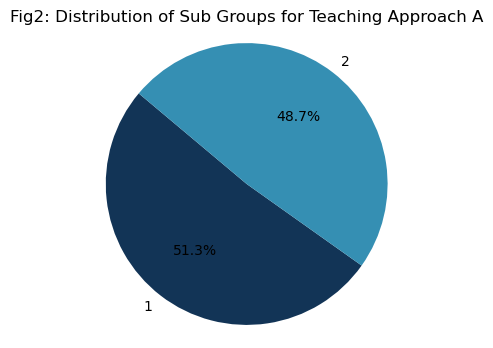

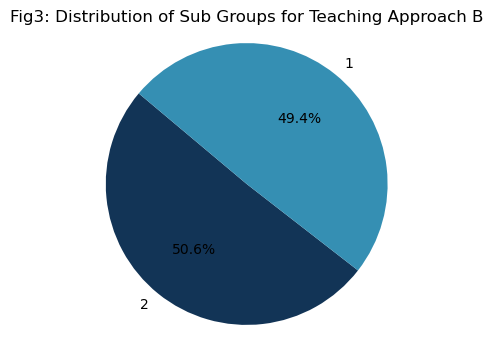

In [90]:
# Pie charts

def pie_chart(df, test_group, fig_num):
    
    # Calculate frequencies of each unique value in the 'test' column
    group_counts = df['sub_group'].value_counts()

    # Extract labels and sizes
    labels = group_counts.index
    sizes  = group_counts.values

    # Create pie chart
    plt.figure(figsize=(4, 4))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#123456', '#358fb3'])
    plt.title(f'Fig{fig_num}: Distribution of Sub Groups for Teaching Approach {test_group}')
    plt.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle
    
    # Show plot
    plt.show()

# Call function
pie_chart(df_A, 'A', '2')
pie_chart(df_B, 'B', '3')

The pie charts for each teaching approach shows that there is a slight imbalance in the subgroups. For teaching approach A there are 2.6% more students with no background knowledge in the subject. For teaching approach B there are 1.2% more students with some background knowledge in the subject.

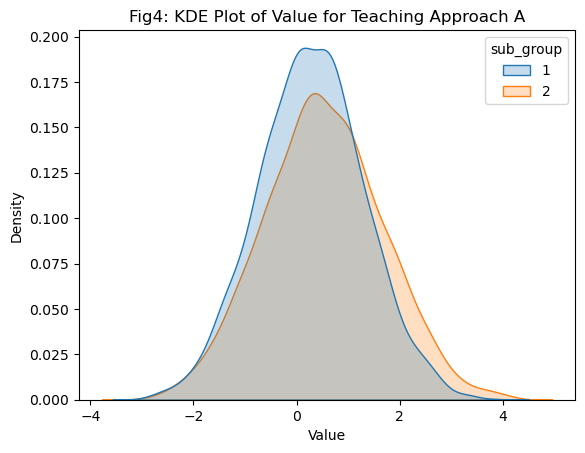

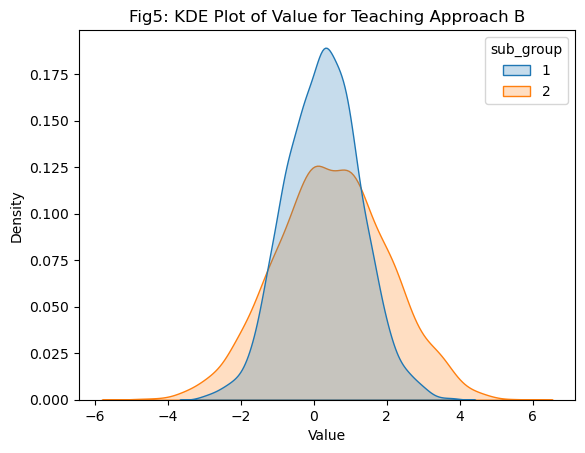

In [91]:
# KDE plots

def kde_plot(df, test_group, fig_num):
    
    # Generate KDE plot for 'value' by 'group'
    sns.kdeplot(data=df, x='value', hue='sub_group', fill=True)

    # Add labels and title
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'Fig{fig_num}: KDE Plot of Value for Teaching Approach {test_group}')

    # Show plot
    plt.show()
    
# Call function
kde_plot(df_A, 'A', '4')
kde_plot(df_B, 'B', '5')

The Kernel Density Estimation (KDE) plots, Fig4 and Fig5, displays the distributions for student outcomes for each teaching approach A and B respectively. The sub groups in each plot are also highlighted. Fig4 indiactes a bimodal distribution for teaching approach A in students who have no background knowledge in the subject. Wheras Fig5 indicates a bimodal distribution for teaching approach B in students who have some background knowledge in the subject. Overall the distributions for student outcomes appear to be somewhat normally distributed across the teaching approaches.

test
A    0.389672
B    0.368538
Name: value, dtype: float64


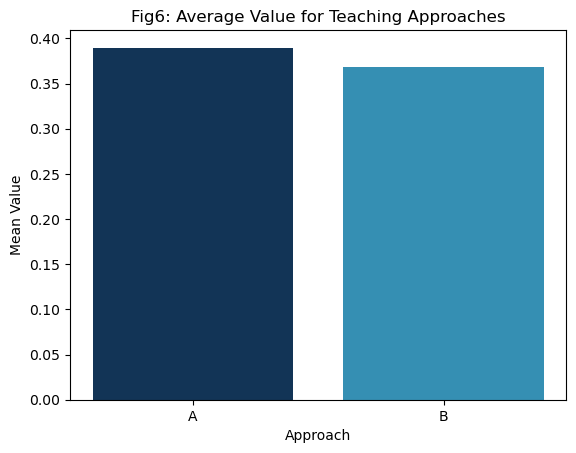

In [92]:
# Bar chart

# Calculate the mean value for each subgroup within test A
mean_values = df.groupby('test')['value'].mean()
print(mean_values)


# Create a bar chart
bars = plt.bar(mean_values.index, mean_values.values, color=['#123456', '#358fb3'])

# Add labels and title
plt.xlabel('Approach')
plt.ylabel('Mean Value')
plt.title(f'Fig6: Average Value for Teaching Approaches')


# Show plot
plt.show()

Students who were assigned to teaching approach A had an average student outcome of 0.39 wheras students who were assigned to teaching approach B had an average of 0.37. This indicates that on average, the current teaching approach produced better student outcomes.  

sub_group
1    0.273059
2    0.512454
Name: value, dtype: float64


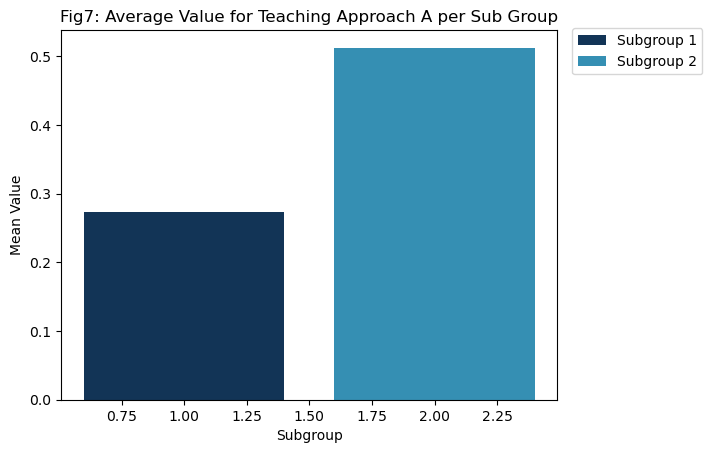

sub_group
1    0.243949
2    0.490165
Name: value, dtype: float64


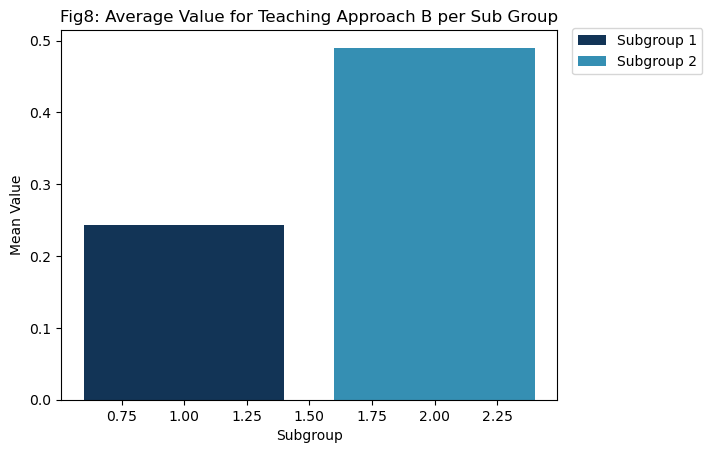

In [93]:
# Bar charts

def bar_chart(df, test_group, fig_num):
    
    # Calculate the mean value for each subgroup within test A
    mean_values = df.groupby('sub_group')['value'].mean()
    print(mean_values)


    # Create a bar chart
    bars = plt.bar(mean_values.index, mean_values.values, color=['#123456', '#358fb3'])

    # Add labels and title
    plt.xlabel('Subgroup')
    plt.ylabel('Mean Value')
    plt.title(f'Fig{fig_num}: Average Value for Teaching Approach {test_group} per Sub Group')

    # Add legend
    plt.legend(bars, ['Subgroup 1', 'Subgroup 2'], loc=(1.03, 0.88))

    # Show plot
    plt.show()
    
# Call function  
bar_chart(df_A, 'A', '7')
bar_chart(df_B, 'B', '8')

Looking at the sub groups within each teaching approach, it is shown that for both teaching approaches A and B students with some background knowledge in the subject have a higher average student outcome. This is to be expected. But it is indicated that teaching approach A produced higher averages for both sub groups compared to teaching approach B. This is in agreement with previous findings (refer to Fig1).

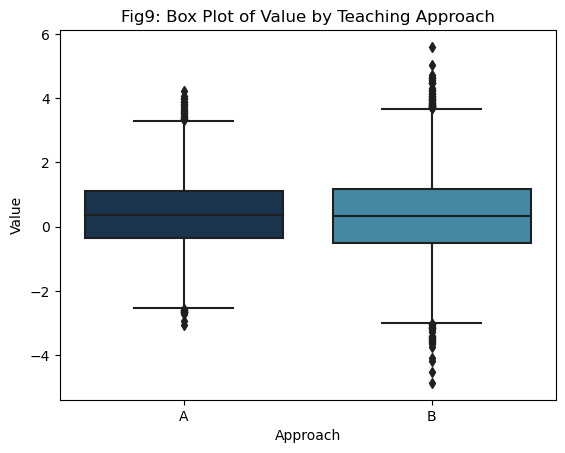

In [94]:
# Box plot

# Create box plot using seaborn
sns.boxplot(data=df, x='test', y='value', palette=['#123456', '#358fb3'])

# Add labels and title
plt.xlabel('Approach')
plt.ylabel('Value')
plt.title(f'Fig9: Box Plot of Value by Teaching Approach')

# Show plot
plt.show()

The box plot above shows that there are outliers in student outcomes for both teaching approaches. Investigating the reason behind these outliers could provide valuable insights into the effectiveness or challenges associated with the teaching approaches. It can be seen that the median student outcomes of the two teaching approaches are approximately equal and the data is symmetrically distributed around the median. However, there is more variation in student outcomes present in teaching approach B. 

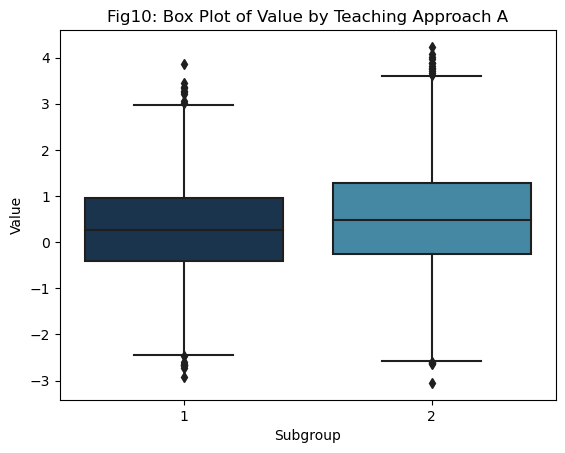

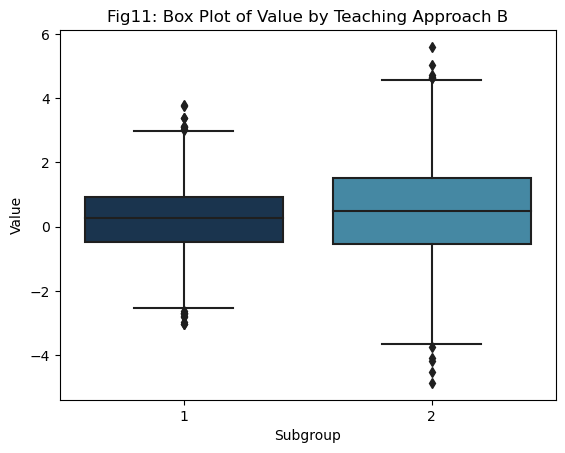

In [95]:
# Box plots

def box_plot(df, test_group, fig_num):
    
    # Create box plot using seaborn
    sns.boxplot(data=df, x='sub_group', y='value', palette=['#123456', '#358fb3'])

    # Add labels and title
    plt.xlabel('Subgroup')
    plt.ylabel('Value')
    plt.title(f'Fig{fig_num}: Box Plot of Value by Teaching Approach {test_group}')

    # Show plot
    plt.show()

# Call function
box_plot(df_A, 'A', '10')
box_plot(df_B, 'B', '11')

It can be seen that the data is symmetrically distributed around the median in both approaches across the subgroups and there is no visible skewness present. This is in agreement with KDE plots produced. There are also many outliers in the data. It can be seen that students with some background knowledge in the subject have higher variability across the teaching approaches 

### Conclusions and recommendations

For both teaching approaches, students with some background knowledge in the subject produced better student outcomes. In conclusion, teaching approach B does not appear to be better than the current teaching approach A. Teaching approach B does appear to negatively impact student outcomes for those with no background knowledge in the subject.

For further investigation, I would perform variable transformation on the student outcomes to handle outliers or understand why they occur. Perhaps there are subgroups present within the subgroups. I would also perform a regression analysis to assess the independent effect of each teaching approach on the student outcomes. Hypothesis testing can also be done to compare the mean outcomes between approach A and B. This will help determine whether there is a statistically significant difference in student outcomes between the two teaching approaches.